<h1 style="text-align: center;">Block Diagrams and System Stability</h1>
<p style="text-align: center;">Lab 7</p>
<p style="text-align: center;">Spring 2024</p>

### 1. Purpose 
Become familiar with Laplace-domain block diagrams and use the factored form of the transfer function to judge system stability. 

### 2. Deliverables Overview 
##### Part 1  
[ ] Equations for the transfer functions in **Task 1**.  
[ ] Printed output using **scipy.signal.tf2zpk()** for **Task 2**.  
[ ] Equation of the open-loop transfer function for **Task 3**
[ ] Plot showing the step response of the open-loop transfer function for **Task 4**.
  
##### Part 2
[ ] Equation of the closed-loop transfer function for **Task 1**
[ ] Printed output and numerical equations using **scipy.signal.tf2zpk()** for **Task 2**.  
[ ] Plot showing the step response of the open-loop transfer function for **Task 3**. 

![Block diagram](BlockDiagram1.png)

$$ G(s) = \frac{s + 9}{(s^2 - 6s - 16)(s + 4)} $$  
$$ A(s) = \frac{s + 4}{S^2 + 4s +3} $$  
$$ B(s) = s^2 + 26s + 168 $$

### 3. Part 1
##### 3.1 Purpose
Analyze a block diagram and learn how to use Python functions to perform the same analysis.  
##### 3.2 Tasks   
1. Type $G(s)$, $A(s)$, and $B(s)$ in factored form, isolating the poles and zeros. Identify the poles and zeros of each function.

Factored form of $G(s)$:  
>$G(s)=\frac{s+9}{(s-8)(s+2)(s+4)}$

Factored form of $A(s)$:  
>$A(s)=\frac{s+4}{(s+1)(s+3)}$

Factored form of $B(s)$:  
>$B(s)=(s+12)(s+14)$

Poles of $G(s)$:  
>$s=8, s=-2, s=-4$

Poles of $A(s)$:  
>$s=-1, s=-3$  

Poles of $B(s)$:  
>none  

Zeros of $G(s)$:  
>$s=-9$

Zeros of $A(s)$:  
>$s=-4$ 

Zeros of $B(s)$:  
>$s=-12, s=-14$

###### 3.2.1 Example Code  
The following example code uses **scipy.signal.convolve()** to expand a factored transfer function, described by $H(s) = \frac{(8s + 1)(2s +3)}{(9s^2 + 2s)(s + 4)}$.

In [24]:
import scipy.signal as sig

num = sig.convolve([8, 1], [2, 3])
den = sig.convolve([9, 2, 0], [1, 4])

print(f"Expanded Numerator: {num}\nExpanded Denominator: {den}")

Expanded Numerator: [16 26  3]
Expanded Denominator: [ 9 38  8  0]


Making the expanded transfer function $H(s) = \frac{16s^2 + 26s + 3}{9s^3 + 38s^2 + 8s}$.  

2. Use the **scipy.signal.tf2zpk()** function to check your results from **Task 1** and print the output. *Note: since $B(s)$ has a denominator of 1, you may use **numpy.roots()** instead*.

In [25]:
# Insert all necessary imports here
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Insert code for Part 1 Task 2 here
numG = (1, 9)
denG = sig.convolve([1, -6, -16], [1, 4])

Z, P, K = sig.tf2zpk(numG, denG)

print("Zeros (Z):", Z)
print("Poles (P):", P)

numA = (1, 4)
denA = (1, 4, 3)

Z, P, K = sig.tf2zpk(numA, denA)

print("Zeros (Z):", Z)
print("Poles (P):", P)

numB = [1, 26, 168]

Z = np.roots(numB)

print("Zeros (Z):", Z)
print("Poles (P): none")

Zeros (Z): [-9.]
Poles (P): [ 8. -4. -2.]
Zeros (Z): [-4.]
Poles (P): [-3. -1.]
Zeros (Z): [-14. -12.]
Poles (P): none


3. Type and properly format the open-loop transfer function where $x(t)$ is the input and $y(t)$ is the output. Keep your answer in factored form.

Insert the open-loop transfer function here:  
$$ H(s) = \frac{s+9}{(s-8)(s+1)(s+2)(s+3)} $$

4. Plot the step response of the open-loop transfer function. Use **scipy.signal.convolve()** to expand the numerator and denominator of the open-loop transfer function. 

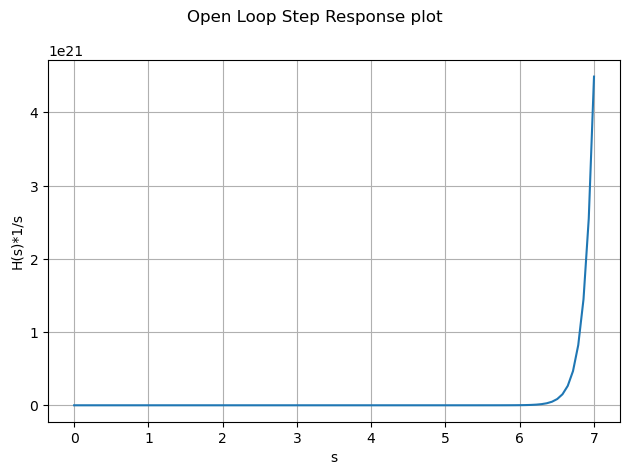

In [30]:
# Insert code plotting the step response of the open-loop transfer function here
numh = [1, 9]
denh = sig.convolve(sig.convolve([1, -8], [1, 1]), sig.convolve([1, 2], [1, 3]))

tout, yout = sig.step((numh, denh))

plt.figure()
plt.suptitle("Open Loop Step Response plot")

plt.plot(tout,yout)
plt.grid()
plt.ylabel("H(s)*1/s")
plt.xlabel("s")

plt.tight_layout()
plt.show()

### 4. Part 2
##### 4.1 Purpose
Become more familiar with using Python for analyzing block diagrams and stability of closed-loop systems.
##### 4.2 Tasks   
1. Type the closed-loop transfer function for the given block diagram symbolically in terms of each blocks numerator and denominator (i.e., numG, denG, ...).

Insert the closed-loop transfer function here:  
$$ H(s) = \frac{numA}{denA}*\left[\frac{\frac{numG}{denG}}{1+numB*\frac{numG}{denG}}\right] = \frac{numA*numG}{denA(denG+numB*numG)}$$

2. Using **scipy.signal.convolve()** and **scipy.signal.tf2zpk()** to perform all the arithmetic, find numerical values for the total numerator and denominator, find poles and zeros, then type the resulting numeric transfer function in both expanded and factored form.

In [28]:
# Insert code for Part 2 Task 2 here
numH = sig.convolve(numA, numG)
denH = sig.convolve(denG + sig.convolve(numB, numG), denA)

print("numH = ", numH)
print("denJ = ", denH)

Z, P, K = sig.tf2zpk(numH, denH)

print("Zeros (Z):", Z)
print("Poles (P):", P)

numH =  [ 1 13 36]
denJ =  [   2   41  500 2995 6878 4344]
Zeros (Z): [-9. -4.]
Poles (P): [-5.16237064+9.51798197j -5.16237064-9.51798197j -6.17525872+0.j
 -3.        +0.j         -1.        +0.j        ]


Insert the expanded numeric closed-loop transfer function here:  
$$ H(s) = \frac{s^2+13s+36}{2s^5+41s^4+500s^3+2995s^2+6878s+4344}$$

Insert the factored numeric closed-loop transfer function here:  
$$ H(s) = \frac{(s-9)(s-4)}{(s+1)(s+3)(s+6.17)(s+5.16+j9.51)(s+5.16-j9.51)}$$

3. Plot the step response of the closed-loop transfer function using **scipy.signal.step()**.

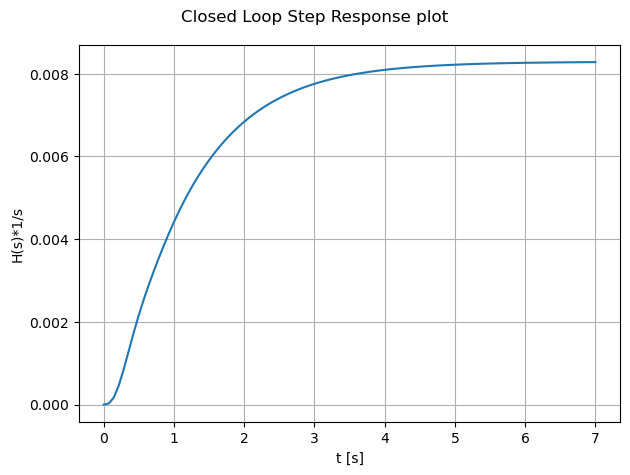

In [31]:
# Insert code for Part 2 Task 3 here
tout, yout = sig.step((numH, denH))

plt.figure()
plt.suptitle("Closed Loop Step Response plot")

plt.plot(tout,yout)
plt.grid()
plt.ylabel("H(s)*1/s")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()

### 5. Questions
1. Considering the expression found in **Part 1, Task 3**, is the open-loop response stable? Explain why or why not.    
>The open-loop response in not stable because of the positive real pole s = 8. 
2. Does the plot from **Part 1, Task 4** support your answer to **Question 1**? Explain how or how it does not.  
>The plot supports my answer because as the value of s approaches 8, the response sharply increases and exceeds $4 \times 10^{21}$.
3. In **Part 1, Task 4**, why does convolving the factored terms using **scipy.signal.convolve()** result in the expanded form of the numerator and denominator? Would this work with your user-defined convolution function from **Lab 3**? Why or why not?  
>Convolution in the s-domain is multiplication in the time-domain. My convolution function would not work for this purpose because it uses time to convolve two functions and is similar to graphical convolution in execution.
4. Using the closed-loop transfer function found in **Part 2, Task 1**, is the closed-loop response stable? Explain why or why not.
>The closed-loop response is stable because all of its poles have negative real parts.  
5. Does the result from **Part 2, Task 3** support your answer to **Question 4**? Explain how or how it does not.  
>The graph supports my previous answer because it can be observed that the response does not exhibit a rapid increase to an extremely high value, but rather levels off near zero. 
6. What is the difference between **scipy.signal.residue()** used in **Lab 6** and **scipy.signal.tf2zpk()** used in this lab?  
>The "residue" function is used to determine the partial fraction decomposition of a transfer function, aiding in the analysis of its time response. On the other hand, the "tf2zpk" function factors and identifies the zeros and poles of a transfer function, contributing to the assessment of system stability.
7. Is it possible for an open-loop system to be stable? What about for a closed-loop system to be unstable? Explain how or how it is not for each.  
>An open-loop system can be stable if the poles of its transfer function have negative real parts. In a closed-loop system, stability depends on both the stability of the open-loop system and the feedback mechanism; the closed-loop system is stable if all poles of the closed-loop transfer function have negative real parts.
8. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>NA